# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Loading libraries

In [599]:
#!python --version
import sklearn
sklearn.__version__
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#!pip uninstall scikit-learn -y
#!pip install -U scikit-learn


In [600]:
# this will help in making the Python code more structured automatically (good coding practice)
#!pip install black-nb
#%load_ext black-nb

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores

import sklearn

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


In [601]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [602]:
##  Complete the code to read the data
Loan = pd.read_csv('/content/drive/MyDrive/UT-Austin-Python/Machine_Learning/personal_loan_campaign/Loan_Modelling.csv')


In [603]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()
data.shape

(5000, 14)

Observations:  There are 5000 rows and 14 Columns



In [604]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [605]:
#get the size of dataframe
print ("Rows     : " , data.shape[0])  #get number of rows/observations
print ("Columns  : " , data.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", data.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(data.isna().sum() / data.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", data.nunique())  #  count of unique values

Rows     :  5000
Columns  :  14
######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
######################################## 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
Percent of missing :

 ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIPCode               0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal_Loan         0.0
Securi

Observations: There are no missing values

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [606]:
data.head() ##  Complete the code to view top 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [607]:
data.tail() ##  Complete the code to view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [608]:
data.shape ##  Complete the code to view dimensions of the data

(5000, 14)

Observations:  There are 5000 rows and 14 Columns

### Check the data types of the columns for the dataset

In [609]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:  There are 13 Integer, 1 float columnin dataset

In [610]:
# Check for duplicated values
data.duplicated().sum()
data.loc[data.duplicated()]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


Observations:  There are no duplicate data in data set.

### Checking the Statistical Summary

In [611]:
data.describe().T  ## Complete the code to get the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations:
*  The avg age of the customer is 45 and a minimum age of 23 and max 67 years.  
*  There are more then 50% customers that are 50 years and above.
*  The avg professional experience of customers are 20 years and a minnimum experience of -3 which seems to be an error.  Max customer professional experience is 43.
*   The avg income is 73K and a max 224 which could be a possible outlier
*   ZipCodes are not defined clearly and requires reformatting
*   The avg Famile size is 2 for more then 50% customers
*   Avg CC spedning is $2K per month
*   The Avg Mortgage is around 56K
*   Personal Loan, Securities and CD account, Education, Credit card stats are not clear and a seperate anylysis may need to perform to understand the impacts of those variables.









### Let's drop the Booking_ID column first before we proceed forward

In [612]:
data = data.drop('ID',axis=1) ## Complete the code to drop the ID column from the dataframe

Observations: ID column has no impact and dropping ID from table.

## Data Preprocessing

### Checking for Anomalous Values

In [613]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
data["Education"].replace(1, "Undergrad", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

Observations: Replacing 1,2,3 with Undergrad,Graduate and professonal to identify any relation of education with income and zip code that may help in creating successful personal loan campaign.

In [614]:
data.tail()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,29,3,40,92697,1,1.9,Professional,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,Undergrad,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,Professional,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,Graduate,0,0,0,0,1,0
4999,28,4,83,92612,3,0.8,Undergrad,0,0,0,0,1,1



* Treating the negative values of Experience: We assume that these negative signs here are data input errors, so we will replace them with positive signs

In [615]:
# checking if experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

Observations:  Adjusting any negative value in experience for accurate analysis and impact

In [616]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

### Feature Engineering

In [617]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

Observations: There are 467 unique Zip Codes in data set

In [618]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


Observations:  The first two digits in Zip Code has 7 unique values in identifying possible customers concentration to further analyze other independent and dependent variables

In [619]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")    # Complete the code to convert the cat_cols to category

Observations: Converting the data type into category to further anlyze the data and evaluate any impacts on personal loan campign

In [620]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


Observations: Data types changed from Integer to category type.

## Exploratory Data Analysis

### Univariate Analysis

In [621]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [622]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

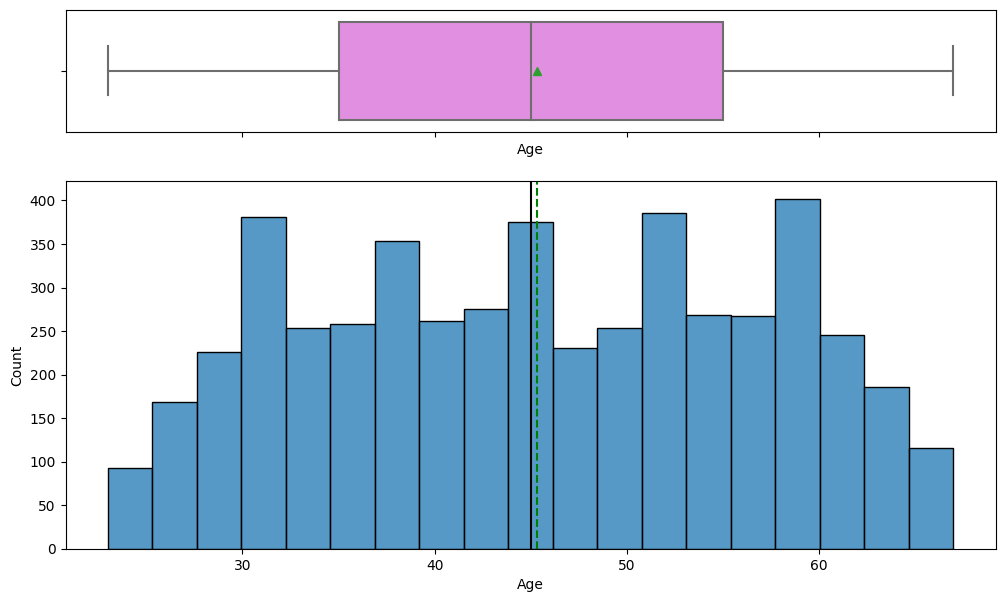

In [623]:
histogram_boxplot(data, 'Age')

Observations: The distribution of age column has negligible right skew and normal.

#### Observations on Experience

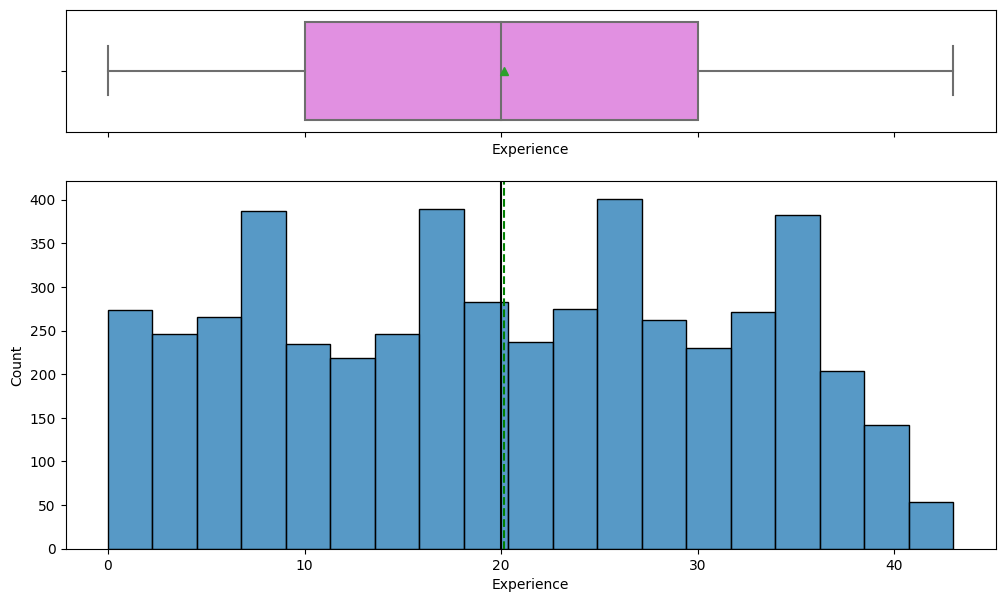

In [624]:
histogram_boxplot(data, 'Experience') ## Complete the code to create histogram_boxplot for experience

Observations: The distribution of Experience column has negligible right skew and normal.

#### Observations on Income

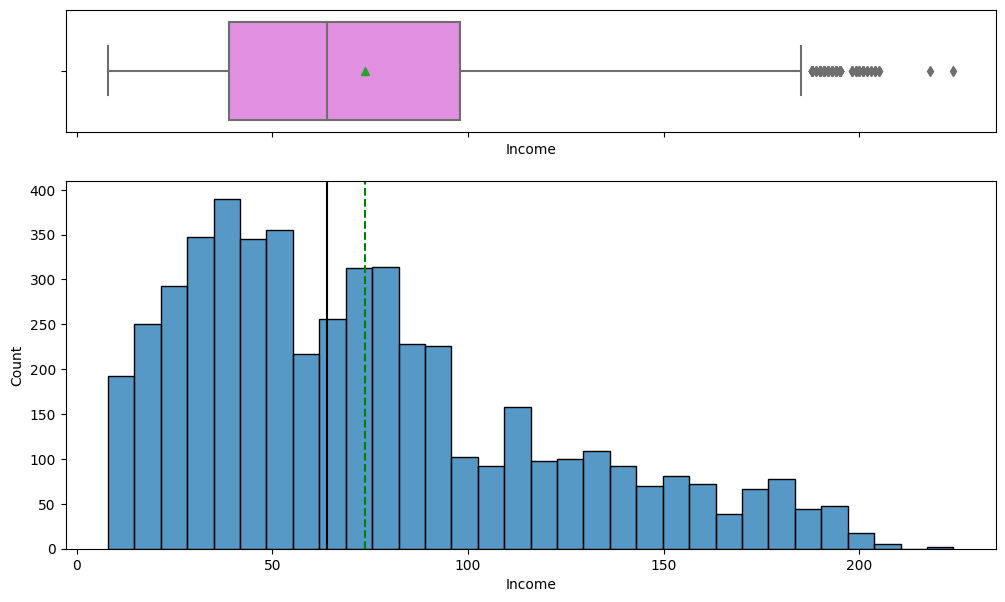

In [625]:
histogram_boxplot(data, 'Income')  ## Complete the code to create histogram_boxplot for Income

Observations: The distribution of income column is right skew with possible outliers.


#### Observations on CCAvg

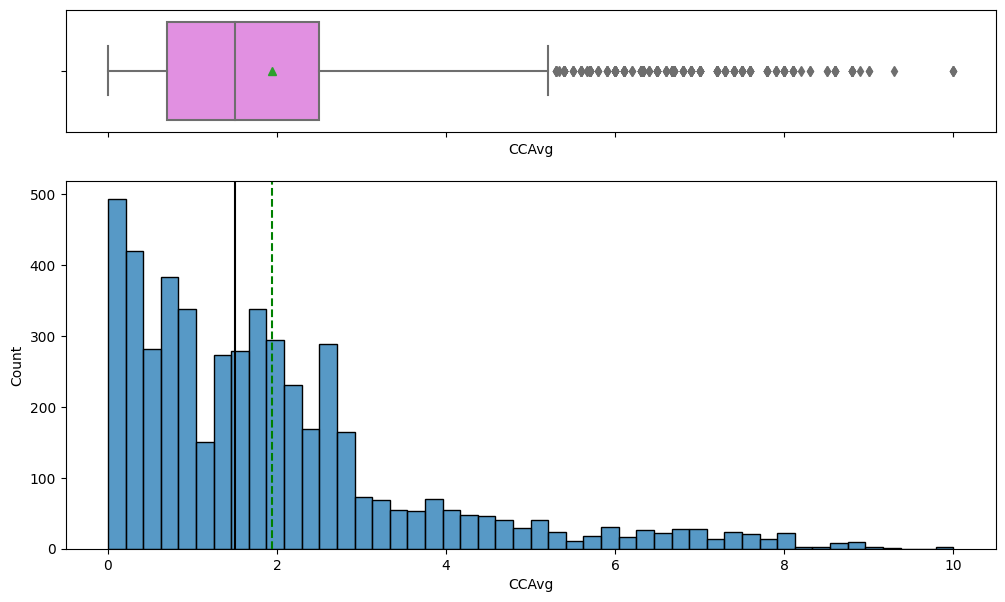

In [626]:
histogram_boxplot(data, 'CCAvg')  ## Complete the code to create histogram_boxplot for CCAvg

Observations: The distribution of CCAvg column is right skewed and with outliers.

#### Observations on Mortgage

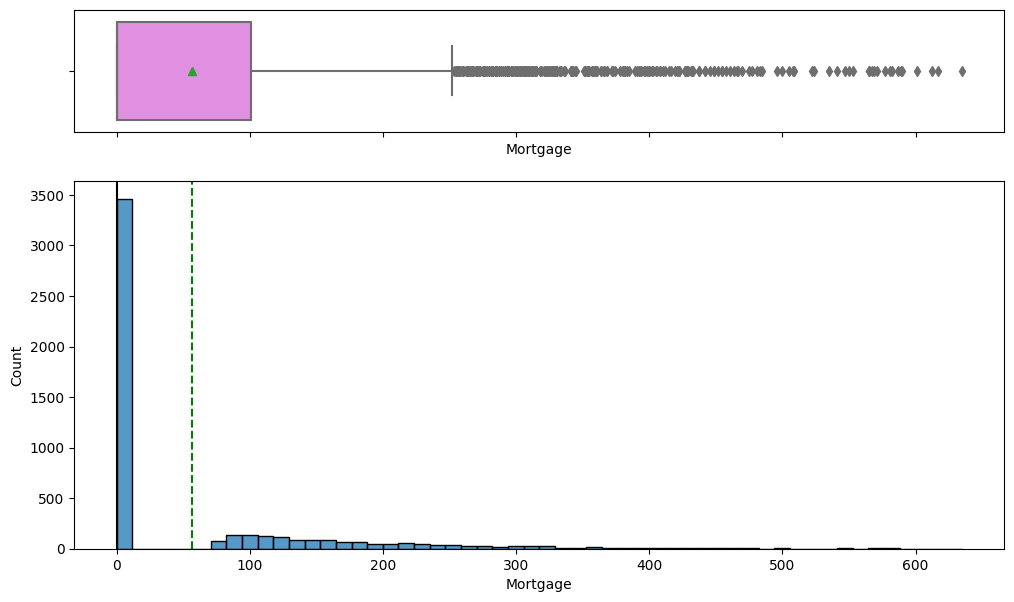

In [627]:
histogram_boxplot(data, 'Mortgage')  ## Complete the code to create histogram_boxplot for Mortgage

Observations: The distribution of Mortgage column is right skew with outliers.

#### Observations on Family

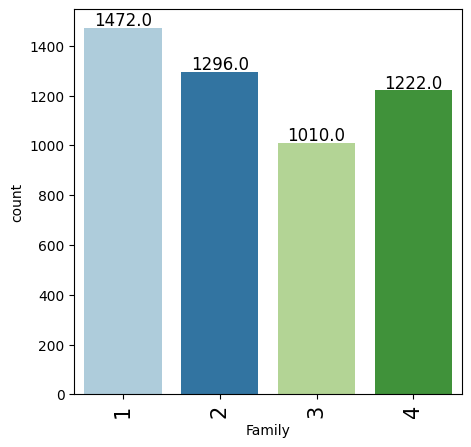

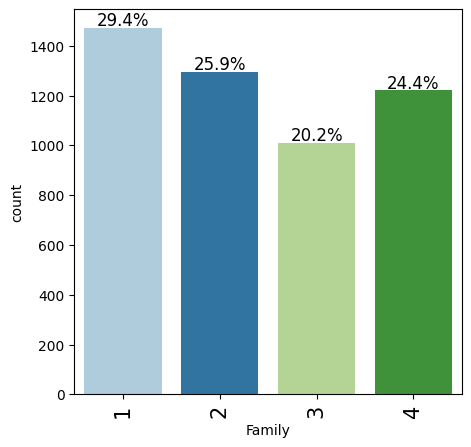

In [628]:
labeled_barplot(data, "Family")
labeled_barplot(data, "Family", perc=True)

Observations: The distribution of Family column has negligible right skew and normal and majortiy family size is 1.

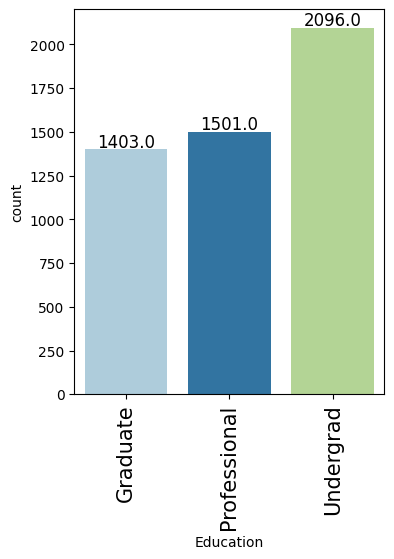

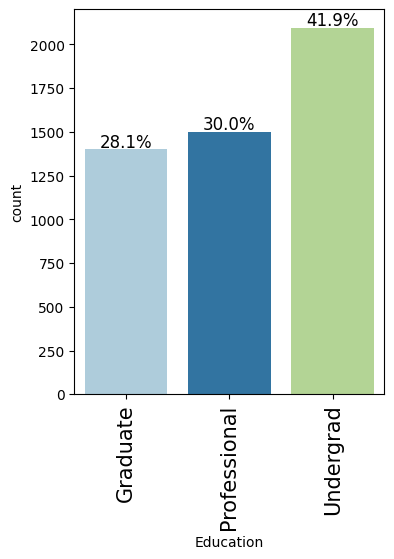

In [629]:
labeled_barplot(data, "Education")
labeled_barplot(data, "Education", perc=True)   ## Complete the code to create labeled_barplot for Education

Observations: The distribution of Education Column has majority of undergrad.

#### Observations on Securities_Account

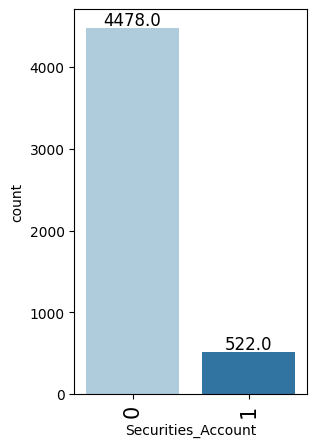

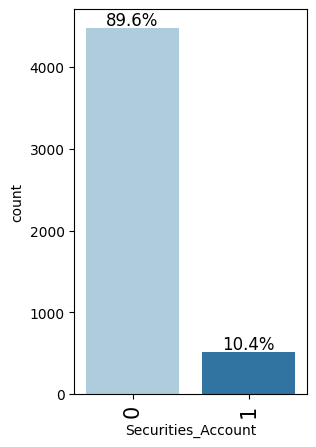

In [630]:
labeled_barplot(data, "Securities_Account")
labeled_barplot(data, 'Securities_Account', perc=True)   ## Complete the code to create labeled_barplot for Securities_Account

Observations: Around 10% of the customers have securities with bank.




#### Observations on CD_Account

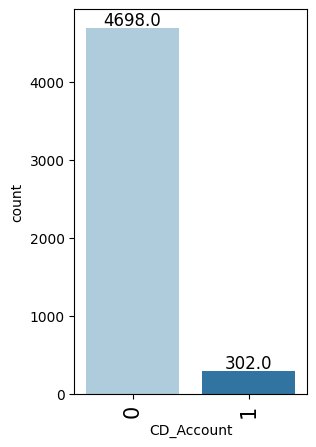

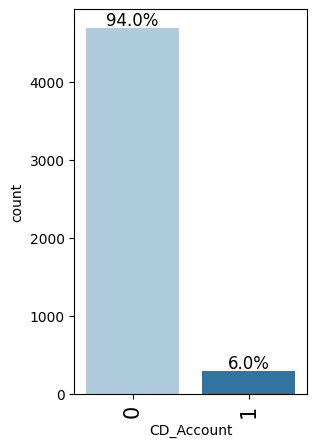

In [631]:
labeled_barplot(data, "CD_Account")
labeled_barplot(data, 'CD_Account', perc=True)   ## Complete the code to create labeled_barplot for CD_Account

Observations: Around 6% of the customers have CD_Account with bank.

#### Observations on Online

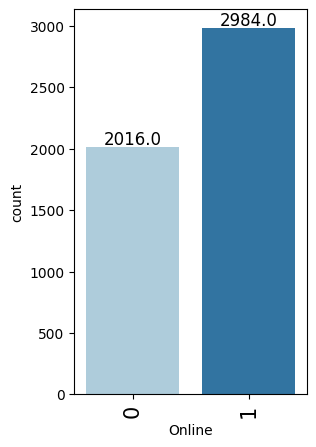

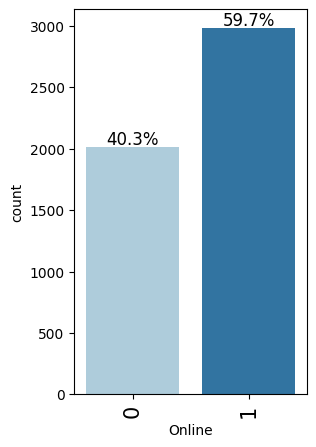

In [632]:
labeled_barplot(data, "Online")
labeled_barplot(data, 'Online', perc=True)   ## Complete the code to create labeled_barplot for Online

Observations: Around 60% of the bank customers bank online

#### Observation on CreditCard

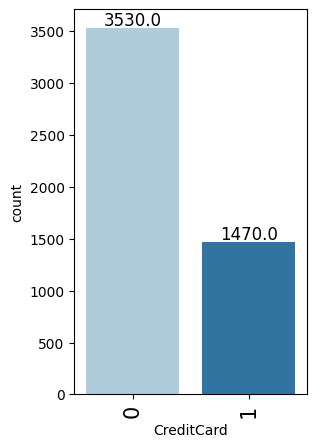

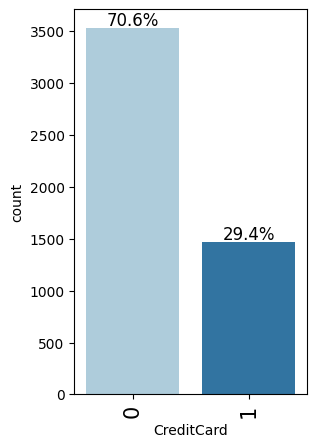

In [633]:
labeled_barplot(data, "CreditCard")
labeled_barplot(data, 'CreditCard', perc=True)   ## Complete the code to create labeled_barplot for CreditCard

Observations: Around 30% of the customers use banks credit card

#### Observation on ZIPCode

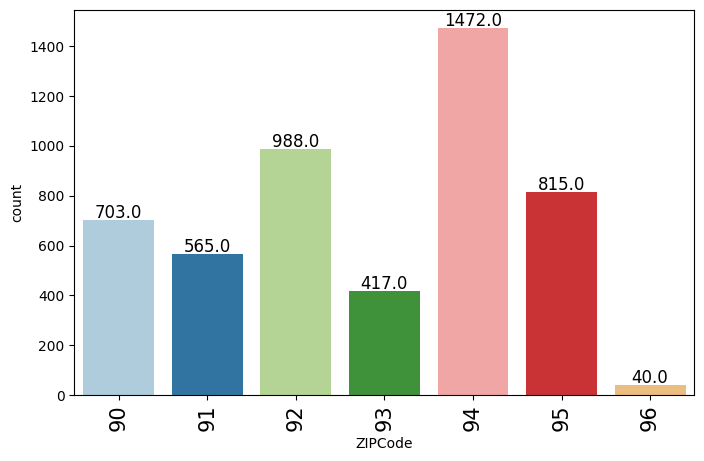

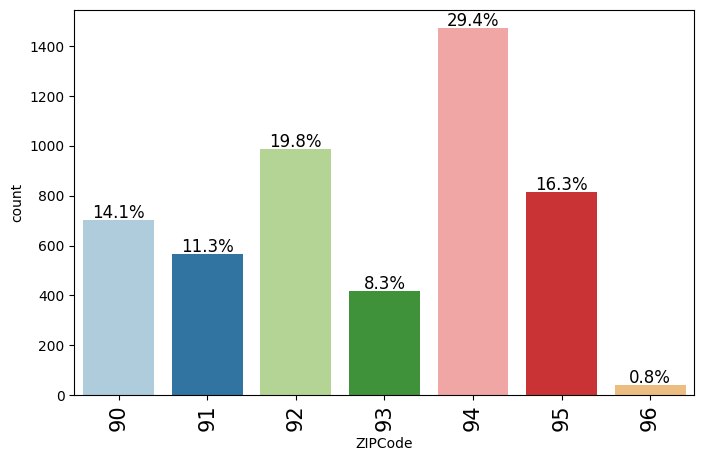

In [634]:
labeled_barplot(data, 'ZIPCode')   ## Complete the code to create labeled_barplot for ZIPCode
labeled_barplot(data, 'ZIPCode', perc=True)   ## Complete the code to create labeled_barplot for ZIPCode

Observations: Majority of AllLife bank customers residing in ZIP code starting with 94

### Bivariate Analysis

In [635]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [636]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

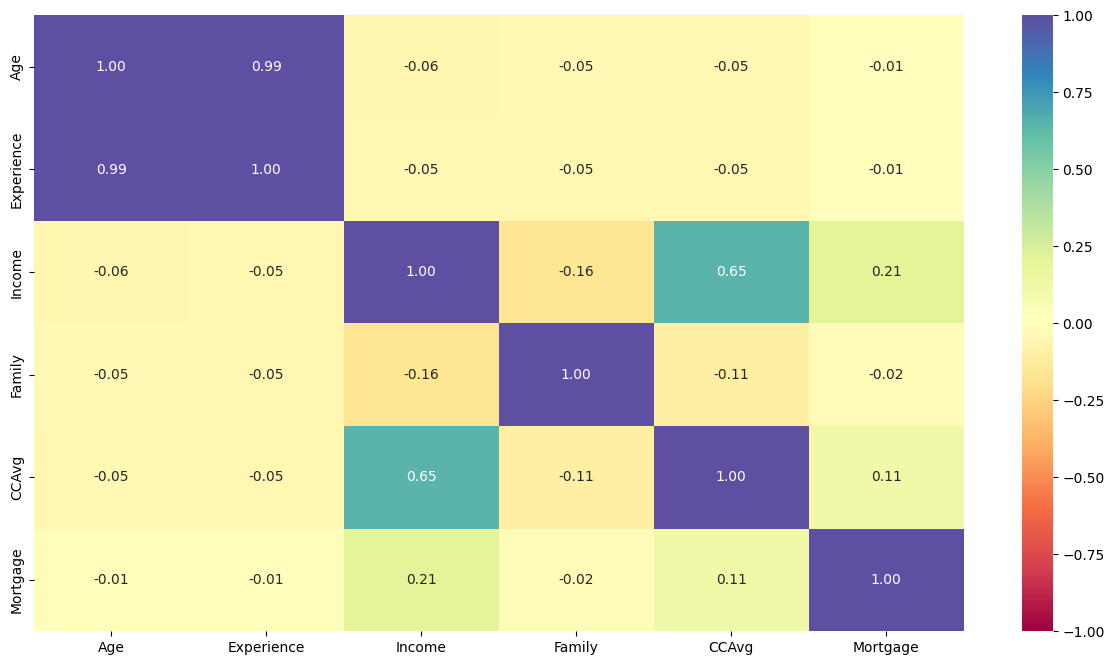

In [637]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

Observations:
*   Experience and Age is highly correlated
*   CCAvg have some positive correlation with Income
*   CCAvg and Mortgage is influenced by Income






#### Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergrad      2003   93  2096
------------------------------------------------------------------------------------------------------------------------


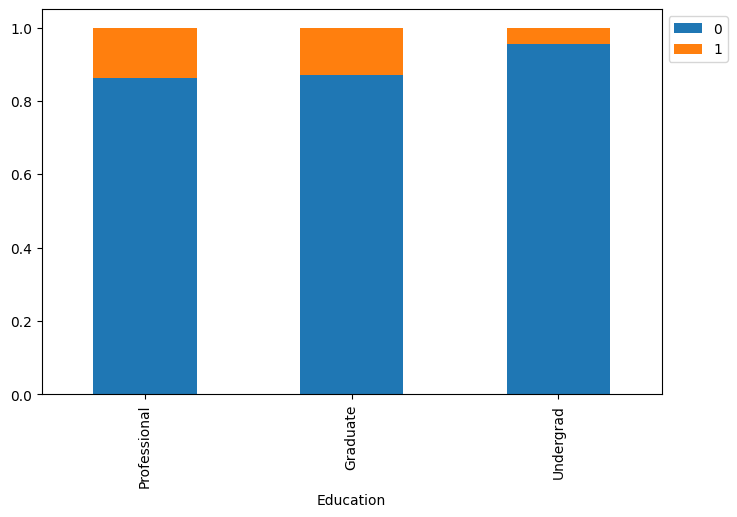

In [638]:
stacked_barplot(data, "Education", "Personal_Loan")

Observations: Peopel with professional educational background tend to have most interest in loan purchase while people with undergrad eduction tend to have least interest in loan purchase.

#### Personal_Loan vs Family

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


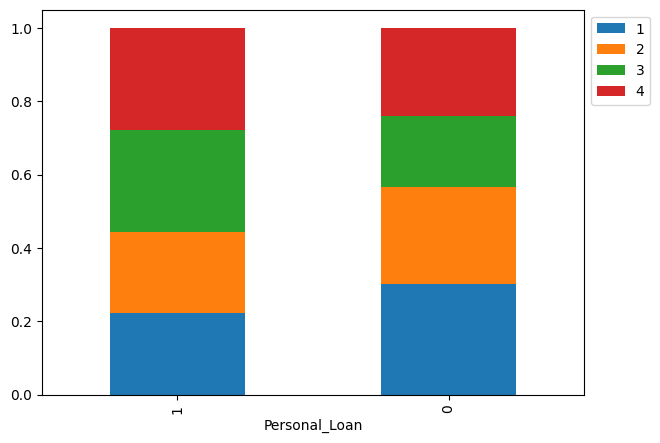

In [639]:
stacked_barplot(data, "Personal_Loan", "Family")  ## Complete the code to plot stacked barplot for Personal Loan and Family

Observations: Overall Family size has no influence on Loan purchase.  It is observed that family that has size 1 have more loan purchase from AllLife bank

#### Personal_Loan vs Securities_Account

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


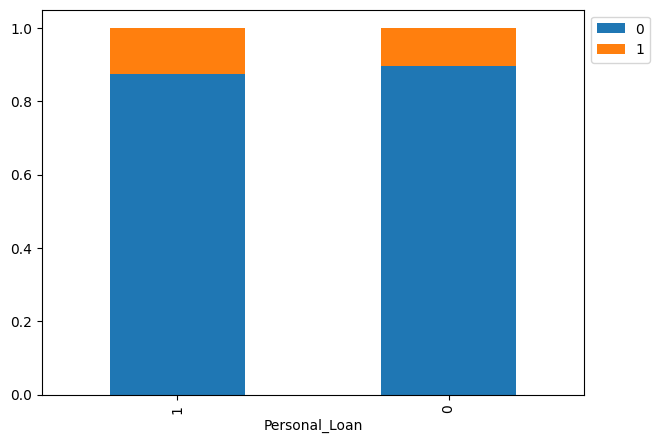

In [640]:
stacked_barplot(data, "Personal_Loan","Securities_Account") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account

Observations: Approx 10% pf AllLife cutomers have secrities with the bank and taking loans

#### Personal_Loan vs CD_Account

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


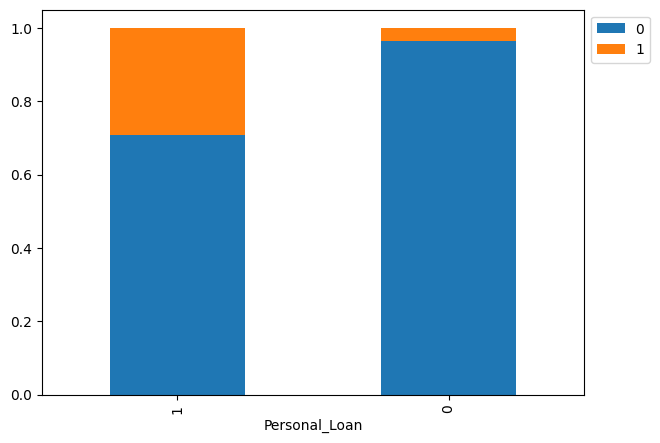

In [641]:
stacked_barplot(data,"Personal_Loan", "CD_Account") ## Complete the code to plot stacked barplot for Personal Loan and CD_Account

Observations:  Customers with CD Accounts at the bank opting for personal loan.

#### Personal_Loan vs Online

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


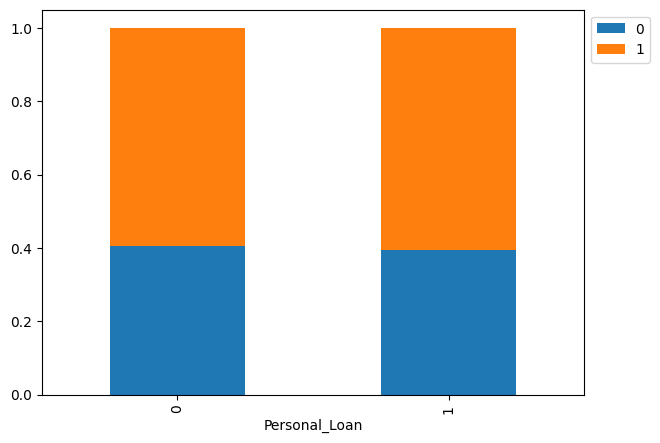

In [642]:
stacked_barplot(data, "Personal_Loan","Online") ## Complete the code to plot stacked barplot for Personal Loan and Online

Observations:  Bank customers online activity is low then their online activity at other banks.  Bank can improve online customer interactions for curomers to seek personal loan options.

#### Personal_Loan vs CreditCard

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


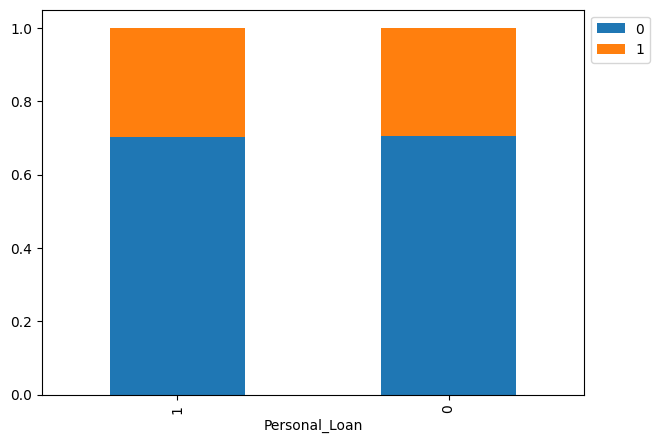

In [643]:
stacked_barplot(data, "Personal_Loan","CreditCard") ## Complete the code to plot stacked barplot for Personal Loan and CreditCard

Observations: Credit card useage has no impact for customers seeking loan from AllLife Bank or other banks.

#### Personal_Loan vs ZIPCode

ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
All            703  565  988  417  1472  815  40  5000
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480
------------------------------------------------------------------------------------------------------------------------


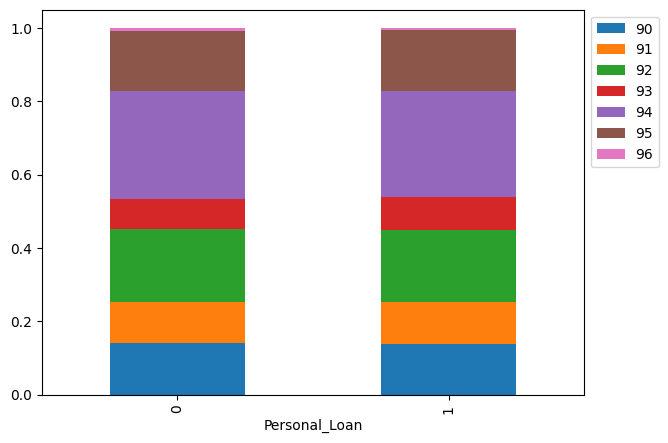

In [644]:
stacked_barplot(data,"Personal_Loan", "ZIPCode") ## Complete the code to plot stacked barplot for Personal Loan and ZIPCode

Observations: Bank cuetomers residingin ZIP code starting at 94 enagaged in more personal loan transactions

#### Let's check how a customer's interest in purchasing a loan varies with their age

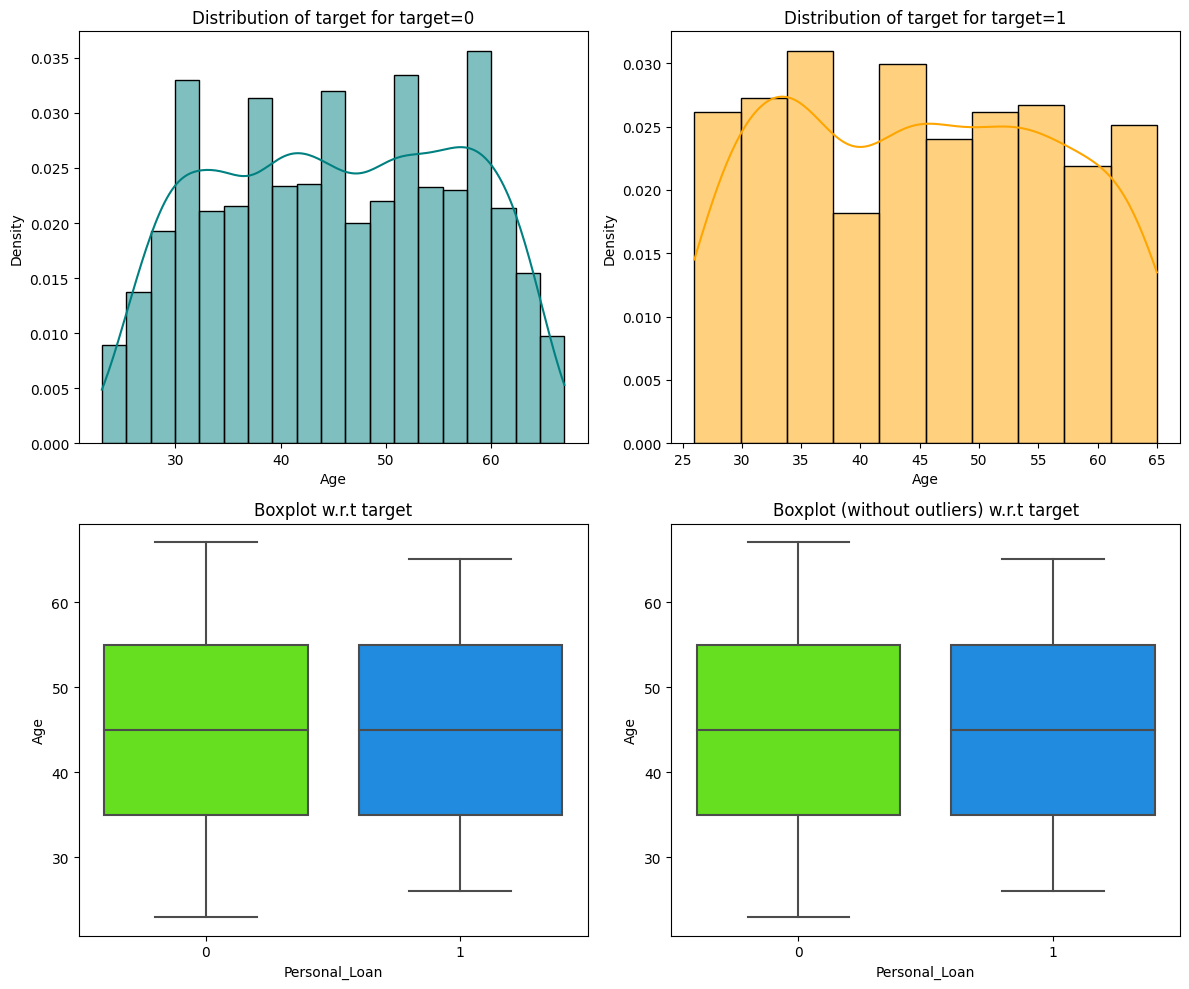

In [645]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

Observations: The Avg Age for customers taking the most loan is 45 years and distribution is normal across data points

#### Personal Loan vs Experience

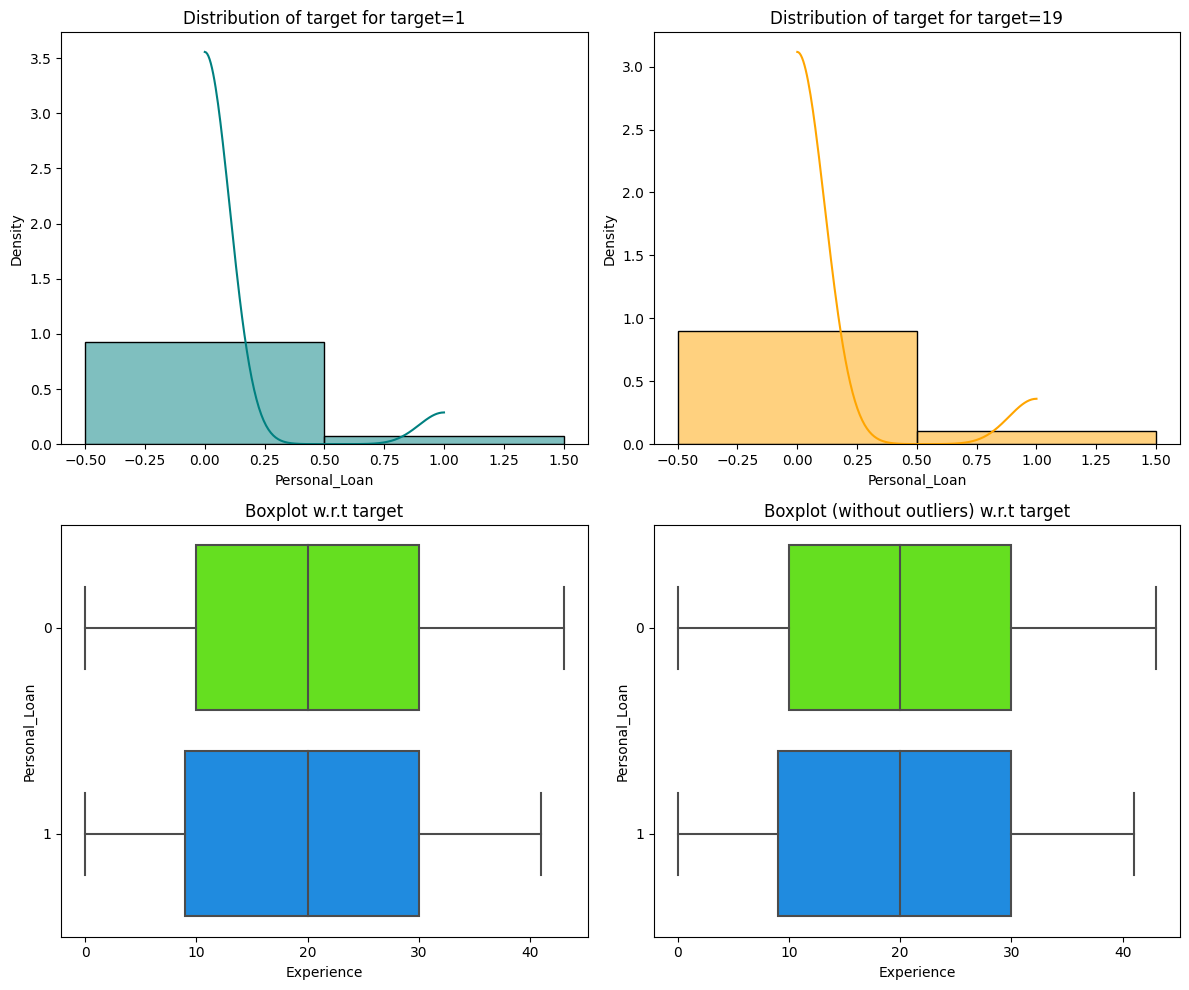

In [646]:
distribution_plot_wrt_target(data, "Personal_Loan", "Experience") ## Complete the code to plot stacked barplot for Personal Loan and Experience

Observations: Bank customers with an avg experience of 20 yrs taking the most loans.

#### Personal Loan vs Income

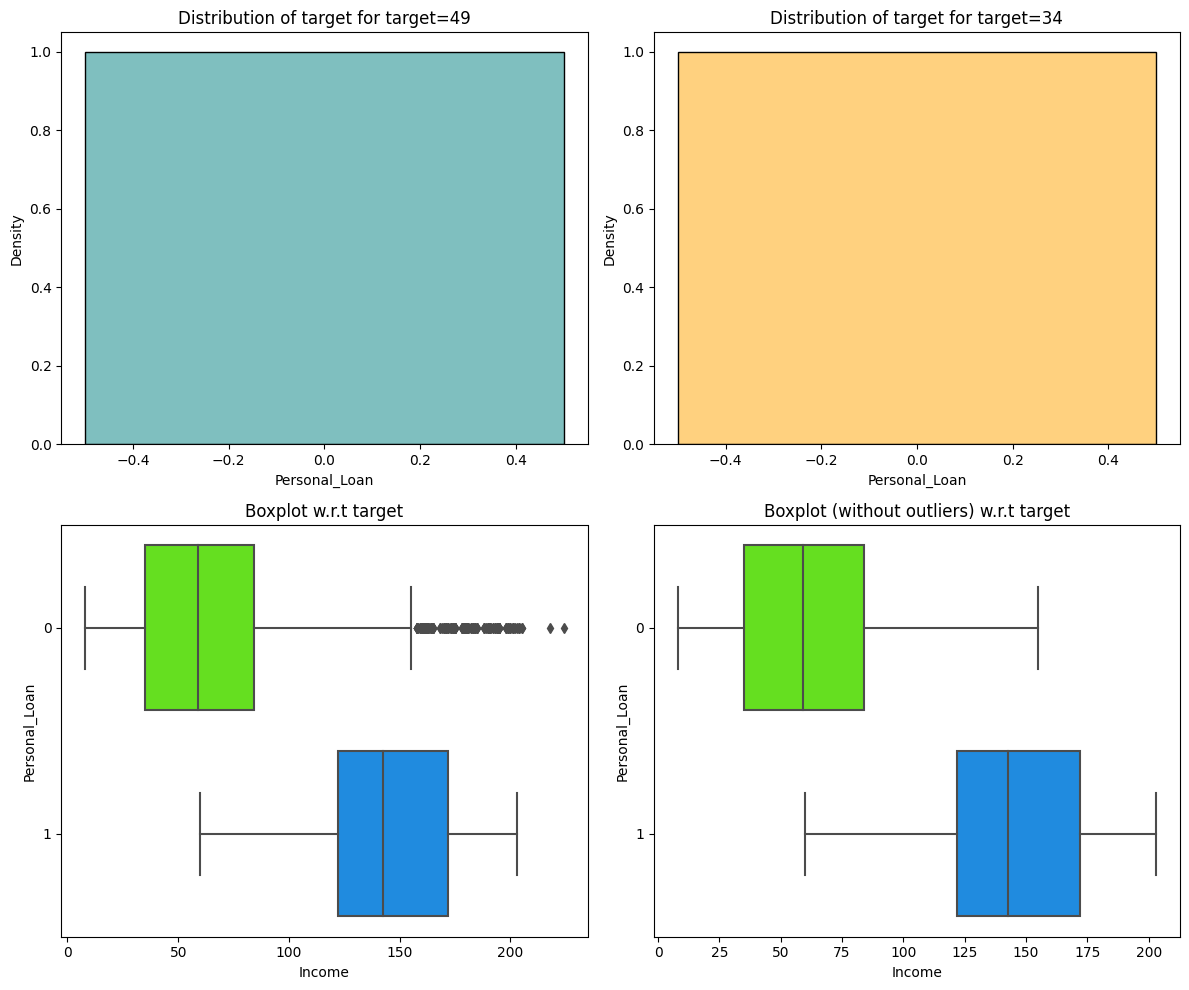

In [647]:
distribution_plot_wrt_target(data,"Personal_Loan", "Income") ## Complete the code to plot stacked barplot for Personal Loan and Income

Observations: Avg income is more then double for customers who have taken loan from the AllLife bank then other banks. Data have lots of outliers and require more investigation.

#### Personal Loan vs CCAvg

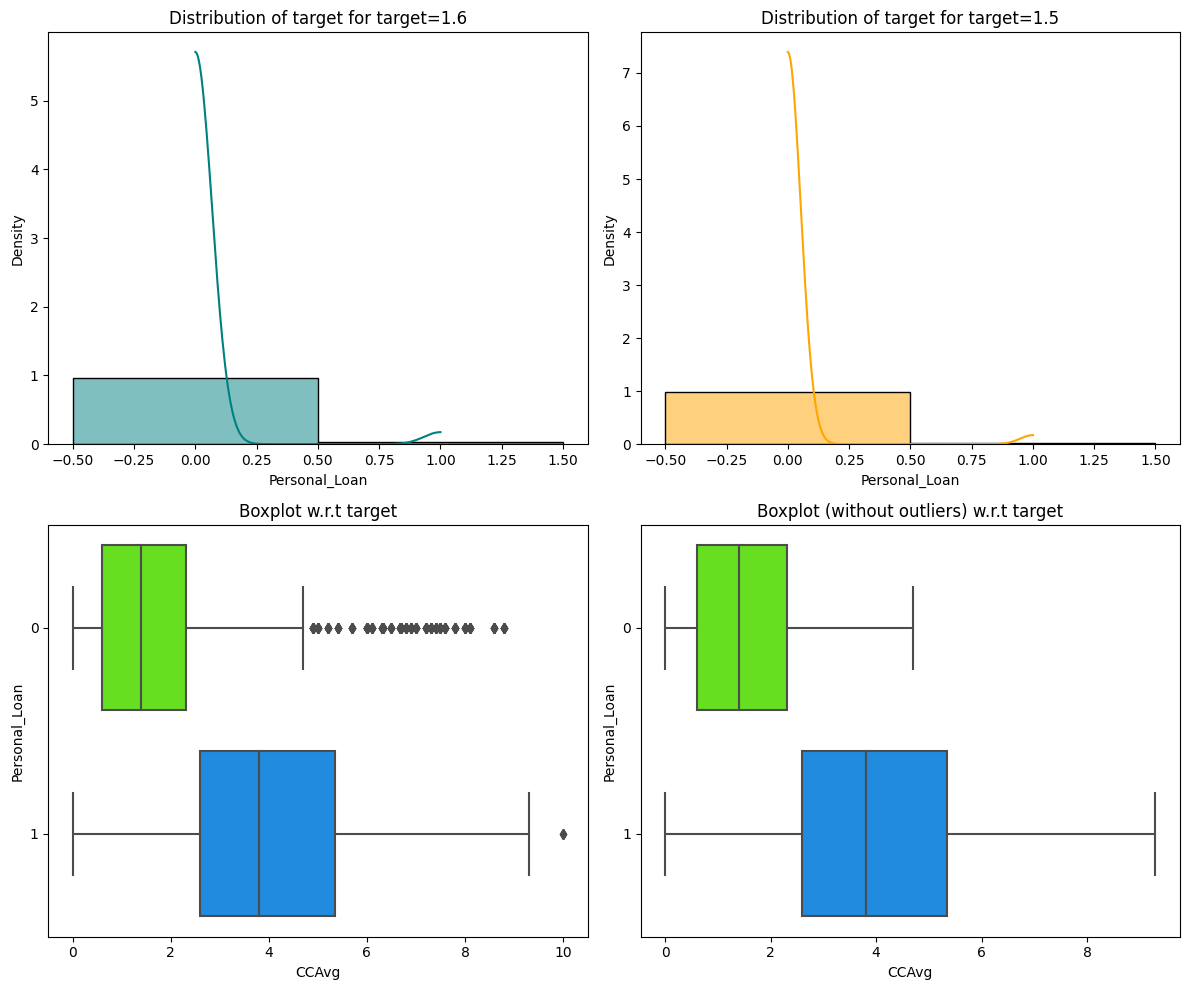

In [648]:
distribution_plot_wrt_target(data,"Personal_Loan", "CCAvg") ## Complete the code to plot stacked barplot for Personal Loan and CCAvg

Observations: Monthly credit card spending is more then double for AllLife bank who took personal loan from the bank. Data have lots of outliers and requires more investigation.

## Data Preprocessing (contd.)

### Outlier Detection

In [649]:
from pydoc import describe
Q1 = data.quantile(0.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR
print(IQR)
print(lower)
print(upper)
data.describe().T

Age            20.0
Experience     20.0
Income         59.0
Family          2.0
CCAvg           1.8
Mortgage      101.0
dtype: float64
Age             5.0
Experience    -20.0
Income        -49.5
Family         -2.0
CCAvg          -2.0
Mortgage     -151.5
dtype: float64
Age            85.0
Experience     60.0
Income        186.5
Family          6.0
CCAvg           5.2
Mortgage      252.5
dtype: float64


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


Observations: Income, CCAvg and Mortage have lots of outliers

In [650]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

Observations: Income, CCAvg and Mortage have lots of outliers

### Data Preparation for Modeling

- The objective is to predict whether a liability customer will buy personal loans.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

In [651]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan","Experience" ], axis=1)
Y = data["Personal_Loan"]
#X = pd.get_dummies(X)
#X = pd.get_dummies(X, drop_first=True)
#X.head()

In [652]:
#data['Education'] = data['Education'].replace({1: 'Undergraduate', 2: 'Graduate', 3: 'Professional'})
#data.head()

# Complete the code to apply dummies on ZIPCode and Education
#HCols=['ZIPCode','Education']
#XC=["ZIPCode","Education"]
#X = pd.get_dummies(X, drop_first=True)
X = pd.get_dummies(X)
#X = pd.get_dummies(X, columns=["ZIPCode","Education"])
#X.head()
#from sklearn.model_selection import train_test_split
# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

In [653]:
X.head()

,Age,Income,Family,CCAvg,Mortgage,ZIPCode_90,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Graduate,Education_Professional,Education_Undergrad,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,49,4,1.6,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0
1,45,34,3,1.5,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0
2,39,11,1,1.0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
3,35,100,1,2.7,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
4,35,45,4,1.0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1


In [654]:
print("Shape of Training set : ", X_train.shape)     # Complete the code to get the shape of train data
print("Shape of test set : ", X_test.shape)           # Complete the code to get the shape of test data
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))              # Complete the code to get the value counts of y train data
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))           # Complete the code to get the value counts of y test data

Shape of Training set :  (3500, 23)
Shape of test set :  (1500, 23)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


Observations: Data set is split into 70% i.e 3500 rows and 23 column traning data set and 30% test data set i.e 1500 rows and 23 column of test data set

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

### Model Building

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [655]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [656]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [657]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

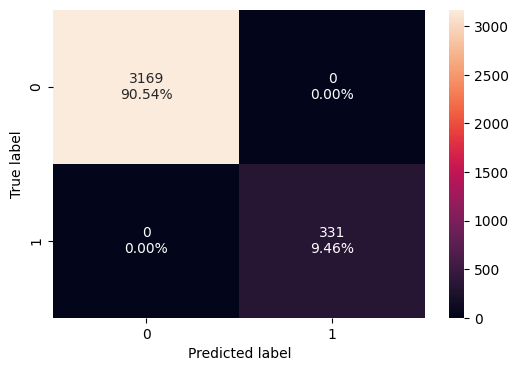

In [658]:
confusion_matrix_sklearn(model, X_train, y_train)

Observations: There are no False Postive or Negative in confusion matrix and 90.54% predicted data is True while 9.46% data as True negative and correctly predicted

In [659]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Observations:  Accuracy, Recall, Precision and F1 score implying pridictive model has maximum level of Accuracy, Recall, Precision and F1.



#### Visualizing the Decision Tree

In [660]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'ZIPCode_90', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Graduate', 'Education_Professional', 'Education_Undergrad', 'Securities_Account_0', 'Securities_Account_1', 'CD_Account_0', 'CD_Account_1', 'Online_0', 'Online_1', 'CreditCard_0', 'CreditCard_1']


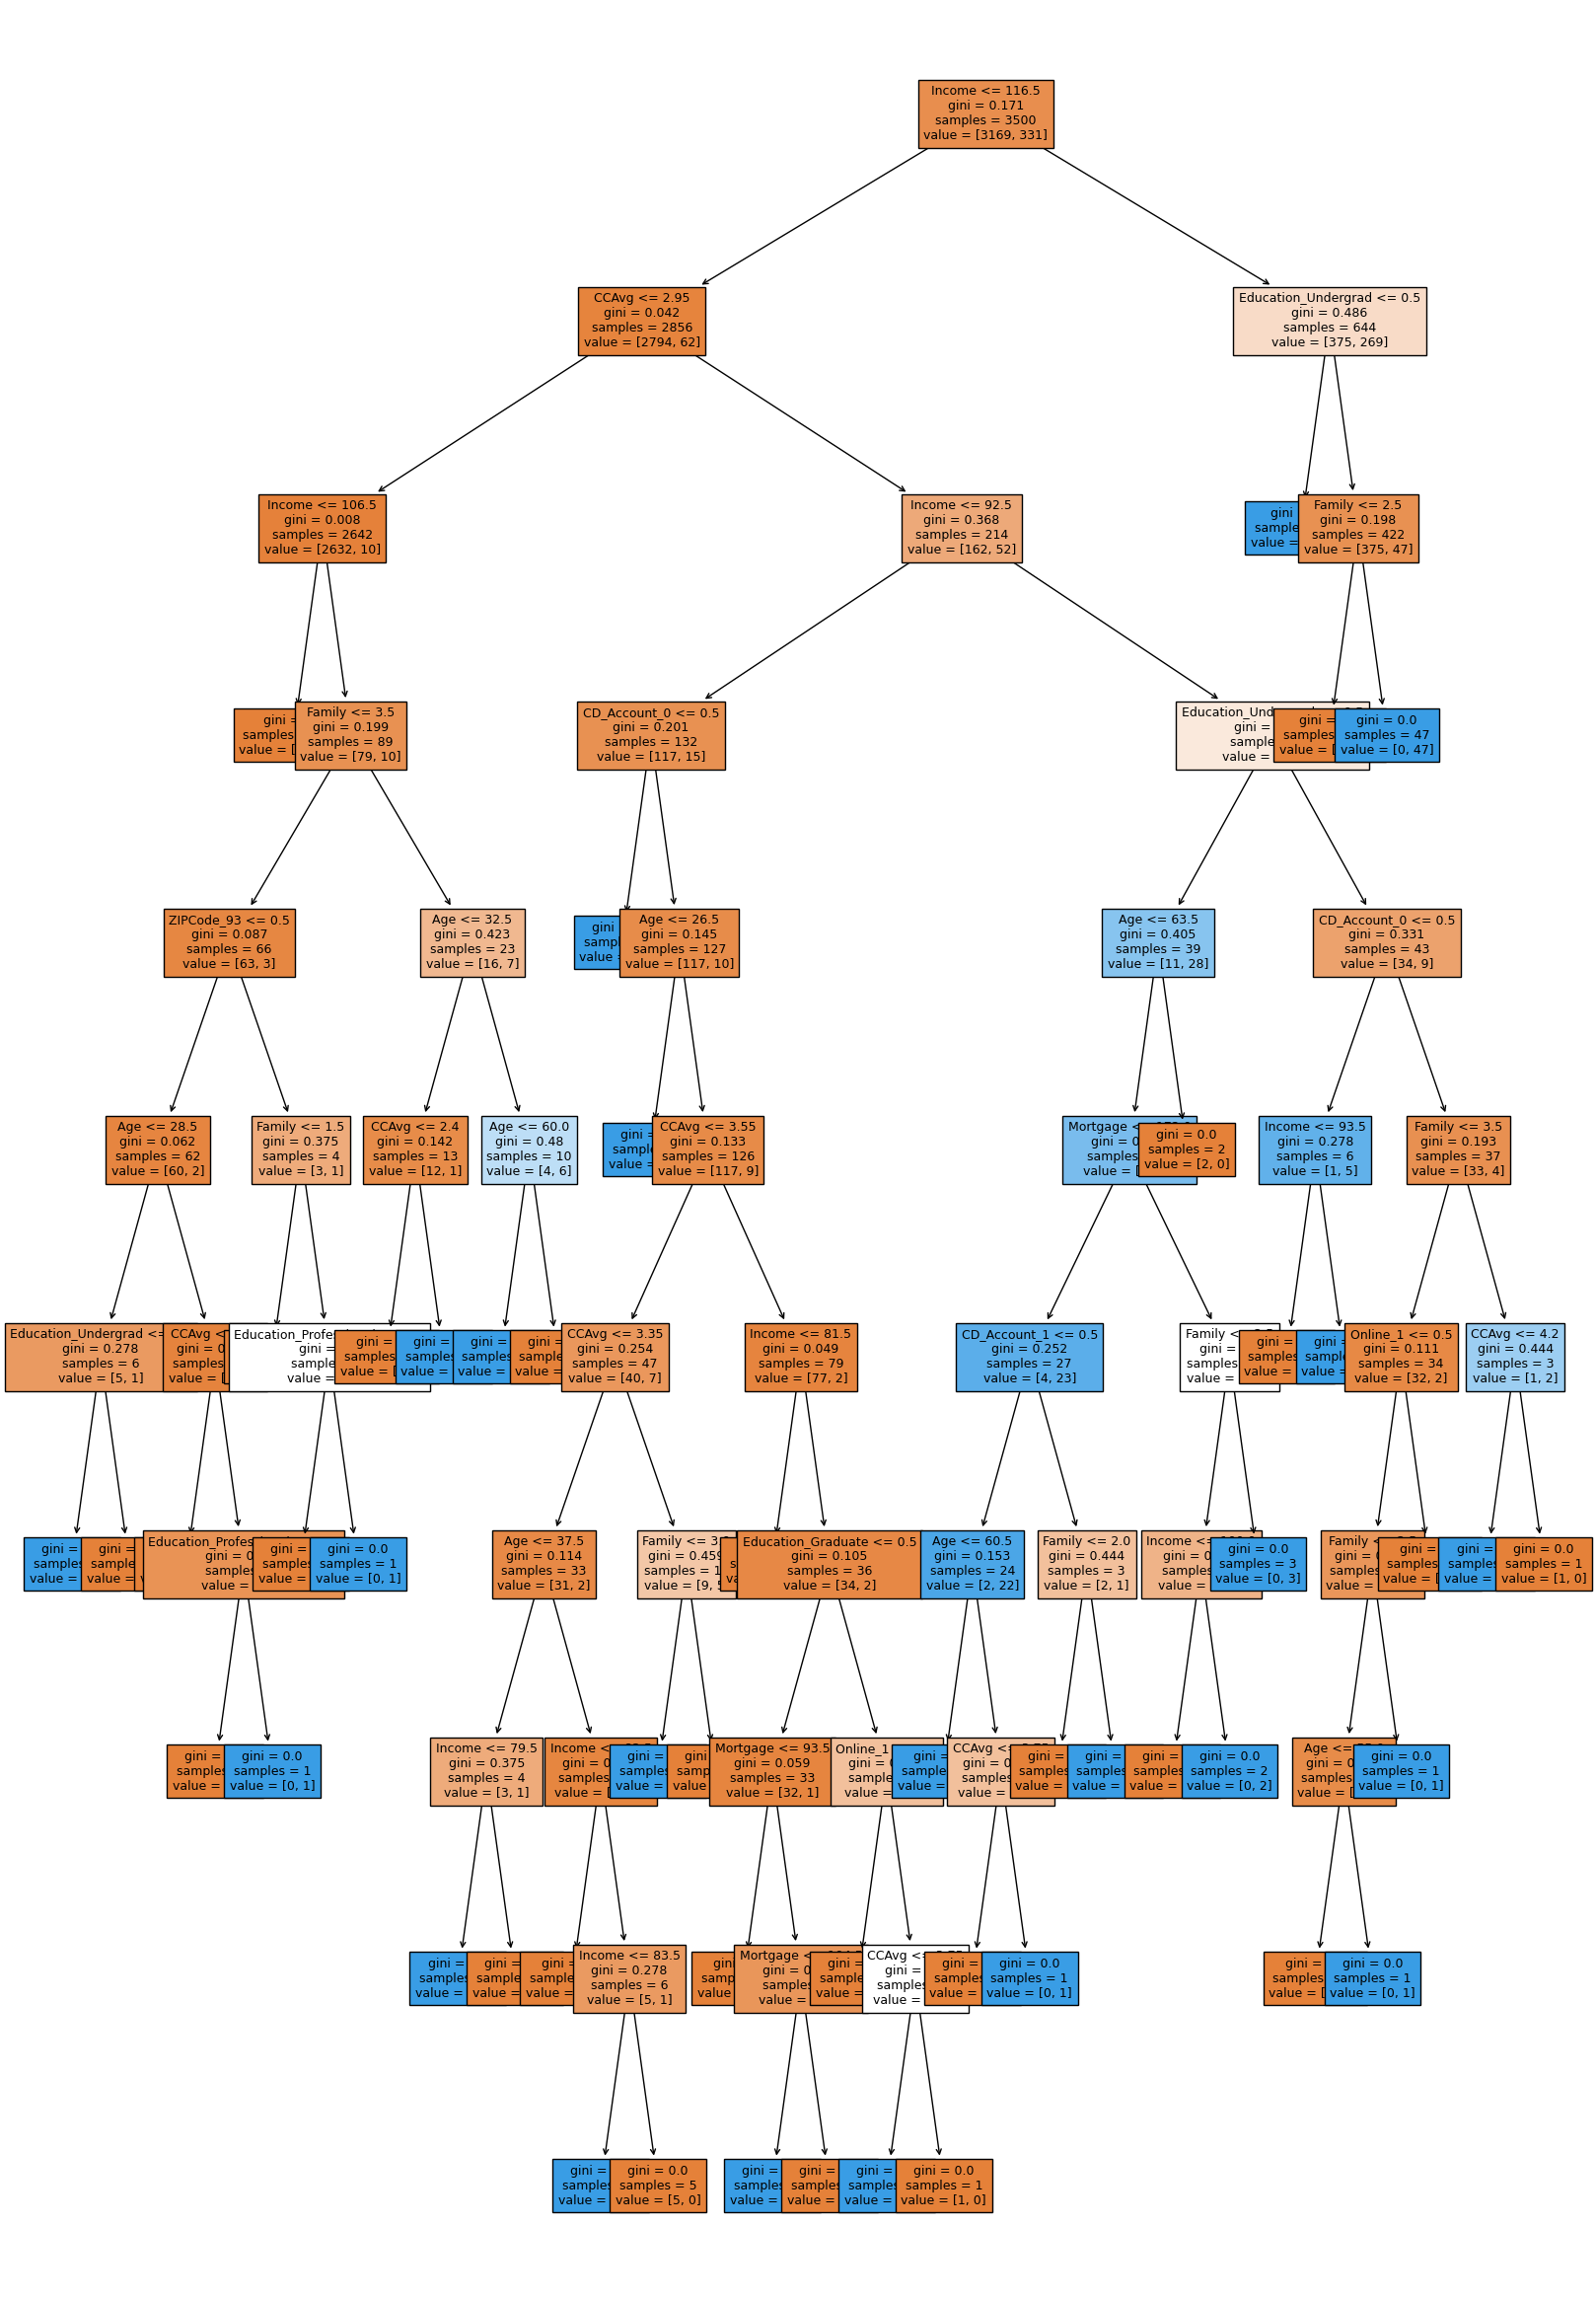

In [661]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [662]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50

In [663]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Education_Undergrad     0.403732
Income                  0.311289
Family                  0.166571
CCAvg                   0.051738
Age                     0.027566
CD_Account_0            0.022684
Mortgage                0.006250
Education_Professional  0.004588
CD_Account_1            0.003028
Online_1                0.001117
Education_Graduate      0.000843
ZIPCode_93              0.000594
Securities_Account_1    0.000000
CreditCard_0            0.000000
Online_0                0.000000
ZIPCode_96              0.000000
Securities_Account_0    0.000000
ZIPCode_95              0.000000
ZIPCode_94              0.000000
ZIPCode_92              0.000000
ZIPCode_91              0.000000
ZIPCode_90              0.000000
CreditCard_1            0.000000


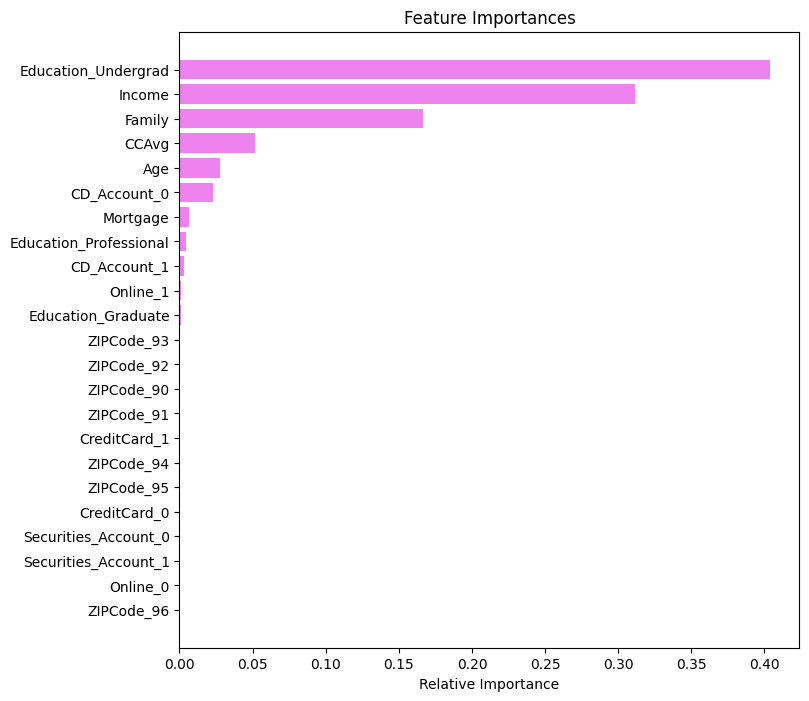

In [664]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:

*  Education, Family,CCAvg and Age are top 4 important features
*  The decision tree model overfits the data, hence highest score of 1 on
  recall, accuracy and F1 precision.




#### Checking model performance on test data

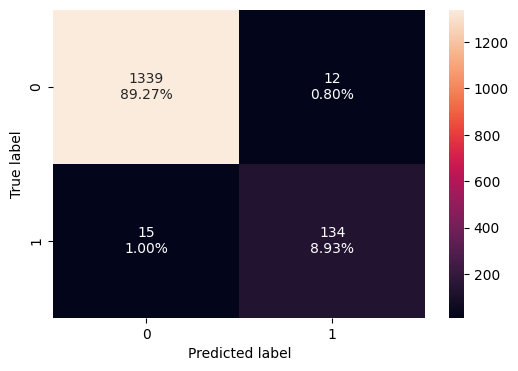

In [665]:
confusion_matrix_sklearn(model, X_test, y_test )  # Complete the code to get the confusion matrix for test data

In [666]:
# Complete the code to get the model formance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.899329,0.917808,0.908475


Observations:
*   Model performing well on testing set with 91% precision and with 98%  
    Accuracy and a F1 score of 0.9

### Model Performance Improvement

#### Pre-Pruning

In [667]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

**Checking performance on training data**

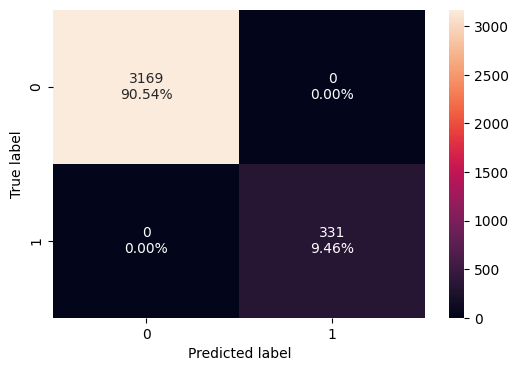

In [668]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

Observations: There are no False Postive or Negative in confusion matrix and 90.54% predicted data is True while 9.46% data as True negative and correctly predicted

In [669]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Observations:  Accuracy, Recall, Precision and F1 score implying pridictive model has maximum level of Accuracy, Recall, Precision and F1.

**Visualizing the Decision Tree**

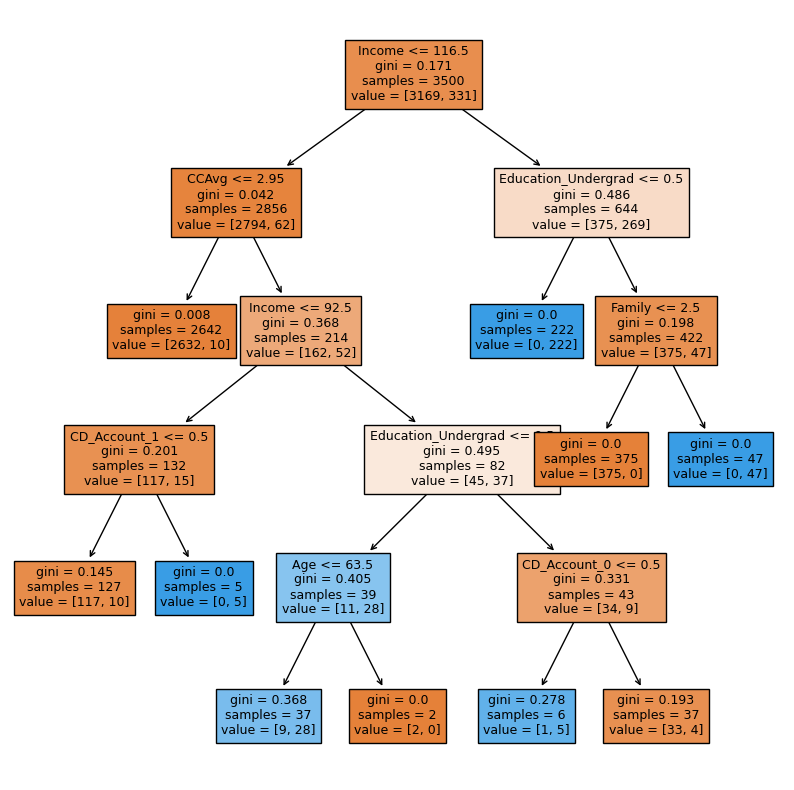

In [670]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [671]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account_1 >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |--- CD_Account_0 <= 0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |   |--- CD_Account_0 >  0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|--- Income >  116.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family <= 2.50
|   |

In [672]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Education_Undergrad     0.446191
Income                  0.327387
Family                  0.155083
CCAvg                   0.042061
CD_Account_1            0.015160
CD_Account_0            0.010083
Age                     0.004035
Education_Professional  0.000000
CreditCard_0            0.000000
Online_1                0.000000
Online_0                0.000000
Securities_Account_1    0.000000
Securities_Account_0    0.000000
ZIPCode_96              0.000000
Education_Graduate      0.000000
ZIPCode_95              0.000000
ZIPCode_94              0.000000
ZIPCode_93              0.000000
ZIPCode_92              0.000000
ZIPCode_91              0.000000
ZIPCode_90              0.000000
Mortgage                0.000000
CreditCard_1            0.000000


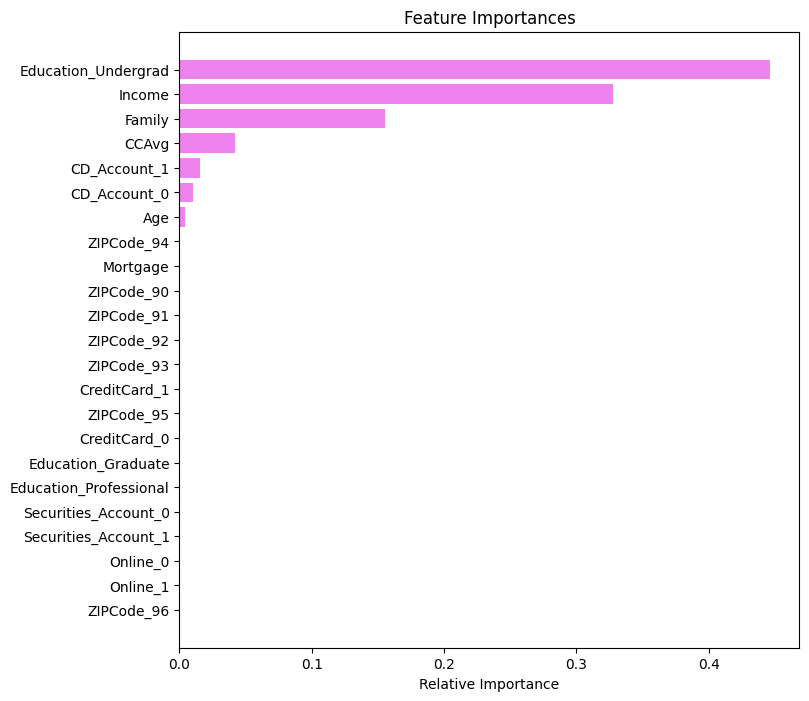

In [673]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

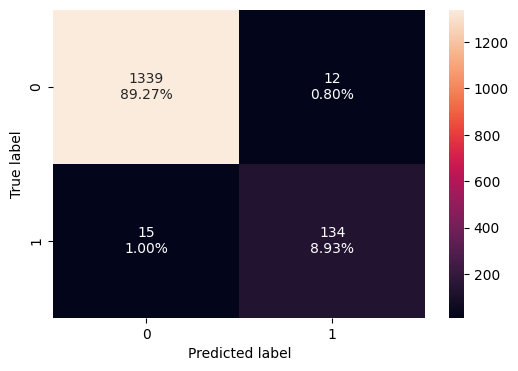

In [674]:
confusion_matrix_sklearn(model, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [675]:
# Complete the code to get the model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.899329,0.917808,0.908475



Observations: There are 1% False Postive and 0.8 false negative in confusion matrix and 89.27% predicted data is True while 8.93% data as True negative and correctly predicted. Over the performance of model on test data fits perfectly and model is predicticting values as desired.

#### Cost-Complexity Pruning

In [676]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [677]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000476,0.006519


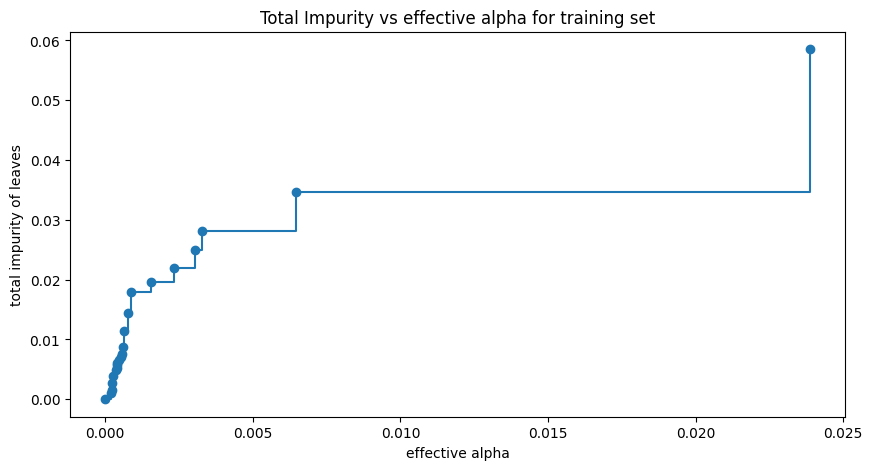

In [678]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [679]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


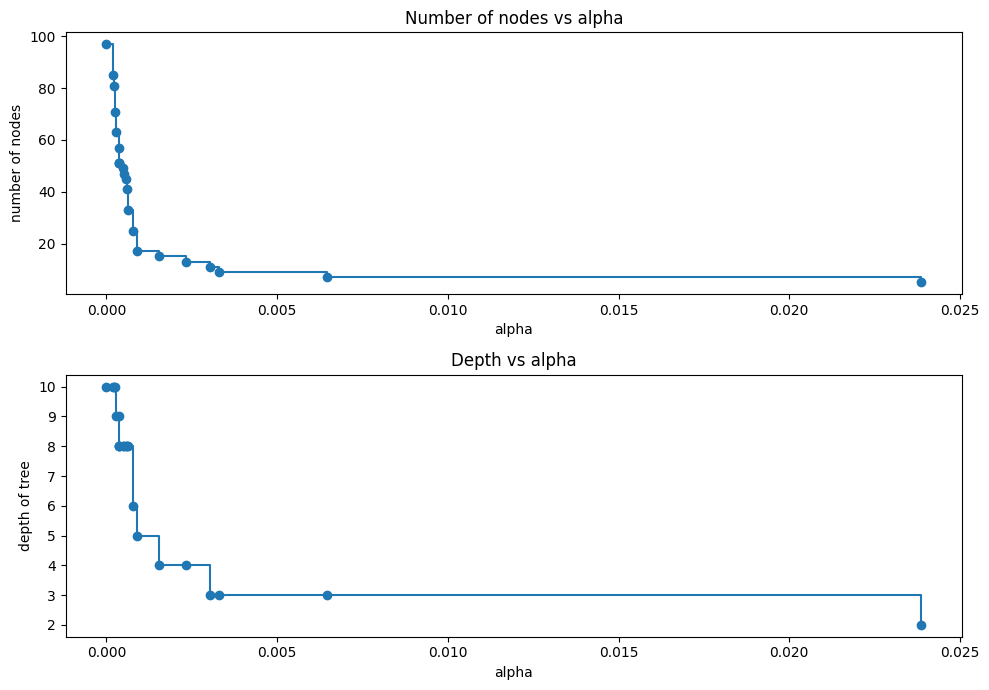

In [680]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**



In [681]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

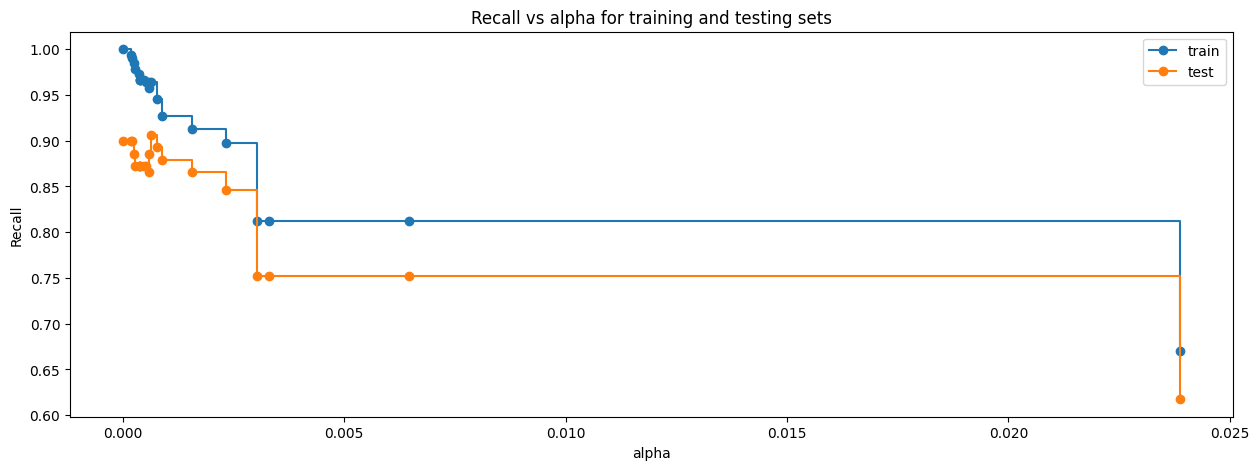

In [682]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Observations: We will choose alpha=0.0006 to minimize recall

In [683]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


#### Post-Purning

In [684]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.0006209286209286216, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking performance on training data**

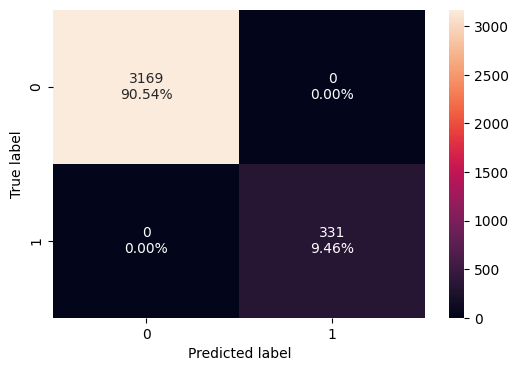

In [685]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [686]:
decision_tree_tune_post_train = model_performance_classification_sklearn(model, X_train, y_train ) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Visualizing the Decision Tree**

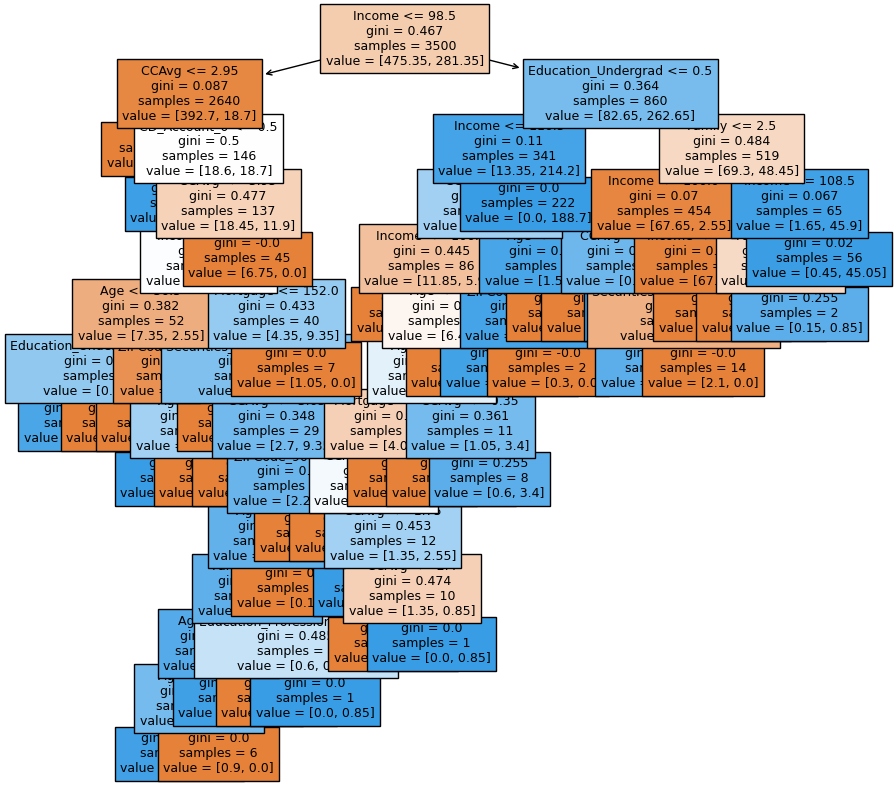

In [687]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [688]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_0 <= 0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|   |   |--- CD_Account_0 >  0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class:

In [689]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income                  0.596601
Family                  0.143258
Education_Undergrad     0.127335
CCAvg                   0.088651
Age                     0.015915
CD_Account_0            0.011167
Mortgage                0.004929
Securities_Account_0    0.004788
ZIPCode_91              0.002635
Education_Professional  0.002020
ZIPCode_93              0.001552
ZIPCode_90              0.001149
CreditCard_0            0.000000
Online_1                0.000000
Online_0                0.000000
CD_Account_1            0.000000
ZIPCode_96              0.000000
Securities_Account_1    0.000000
Education_Graduate      0.000000
ZIPCode_95              0.000000
ZIPCode_94              0.000000
ZIPCode_92              0.000000
CreditCard_1            0.000000


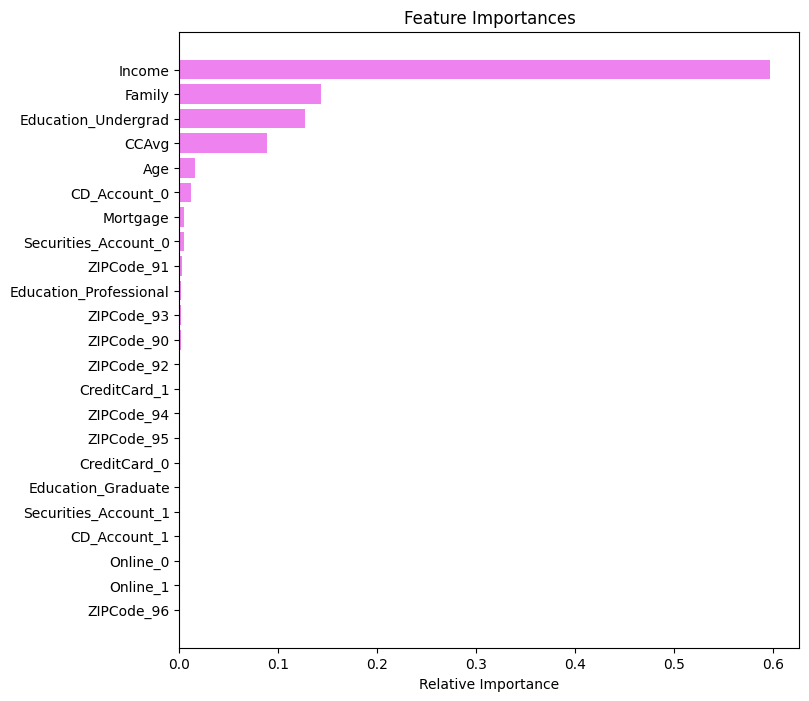

In [690]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

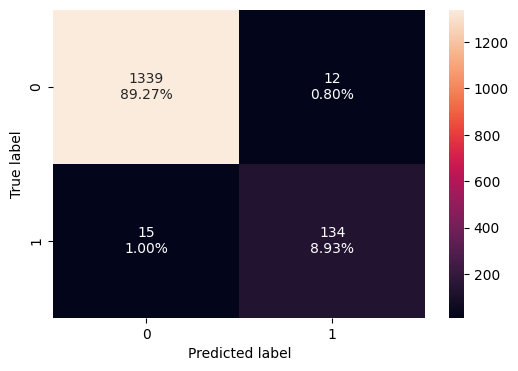

In [691]:
confusion_matrix_sklearn(model,X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [692]:
# Complete the code to get the model performance on test data
decision_tree_tune_post_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.982,0.899329,0.917808,0.908475


## Model Performance Comparison

In [693]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,1.0
Recall,1.0,1.0,1.0
Precision,1.0,1.0,1.0
F1,1.0,1.0,1.0


In [694]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.982000,0.982000,0.982000
Recall,0.899329,0.899329,0.899329
Precision,0.917808,0.917808,0.917808
F1,0.908475,0.908475,0.908475


## Actionable Insights and Business Recommendations


The model work without any significant change pre and post prune and provided an accurate prediction of type of customers who will accept personal loan.

**What recommedations would you suggest to the bank?**

Our AI modelling identified Education, Age, Family size, Motagage,CCAvg and CD Accounts are the most important factors in determining if a customer will accept a personal loan.
Customers with higher mortagage balance can be good target customers to offer personal loan.
Customers with high CCAvg can be good candidates for personal loans but they do have a higher risk to default the loan
Customers with CD accounts are good candidates and will accept loan offers. Having CD account can be a good collateral against any loans to minimize loan related risk.
Personal loan offer may not attarct customer with longer experience and target customers range are from 30-45 yrs.
AllLife bank must review their online loan offer tools with special offers to attarct a good majoirty of customers who bank 60% online.





*


In [697]:
!pip install nbconvert

___

In [698]:
!jupyter nbconvert --to html /content/drive/MyDrive/UT-Austin-Python/Machine_Learning/personal_loan_campaign/SL_Low_Code.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/UT-Austin-Python/Machine_Learning/personal_loan_campaign/SL_Low_Code.ipynb to html
[NbConvertApp] Writing 3379135 bytes to /content/drive/MyDrive/UT-Austin-Python/Machine_Learning/personal_loan_campaign/SL_Low_Code.html
